In [9]:
import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
y_test, y_train = y_test.ravel(), y_train.ravel()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000,), (10000,))

In [10]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

labels_dict = {i: label for i, label in enumerate(labels)}

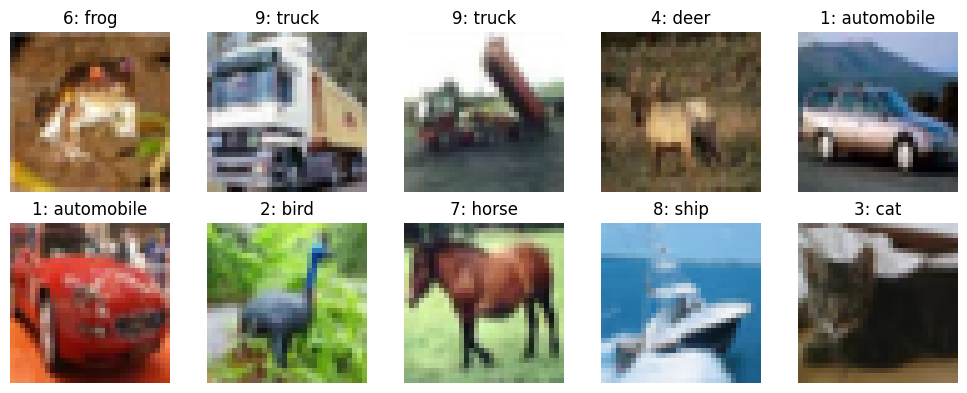

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")
fig.tight_layout()

In [12]:
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255

In [13]:
from keras import layers

def CNN_model(learning_rate = 0.001, drop_rate=0.5, kernels=[32,64]):
    adam = keras.optimizers.Adam(learning_rate=learning_rate)

    model = keras.Sequential(name="CNN")

    for kern in kernels:
        conv_layer = layers.Conv2D(kern, kernel_size=3, activation="relu", kernel_initializer="he_normal",
                                   input_shape = X_train.shape[1:])
        
        model.add(conv_layer)
        model.add(layers.MaxPooling2D(pool_size=2, strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(drop_rate))
    model.add(layers.Dense(256, activation="relu", kernel_initializer="he_normal"))
    model.add(layers.Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
    return model


In [15]:
model = CNN_model(.001, .5, [32, 64, 32])
model.summary()

c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(scaled_X_train, y_train, epochs=100, callbacks=[early_stopper], validation_split=0.2)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.2556 - loss: 1.9884 - val_accuracy: 0.4517 - val_loss: 1.4971
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.4280 - loss: 1.5378 - val_accuracy: 0.5336 - val_loss: 1.2956
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.4928 - loss: 1.3892 - val_accuracy: 0.5321 - val_loss: 1.2979
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.5260 - loss: 1.3025 - val_accuracy: 0.5777 - val_loss: 1.1788
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.5580 - loss: 1.2257 - val_accuracy: 0.6041 - val_loss: 1.1248
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.5735 - loss: 1.1792 - val_accuracy: 0.6313 - val_loss: 1.0726
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.5937 - loss: 1.1376 - val_accuracy: 0.6449 - val_loss: 1.0092
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 

In [17]:
import pandas as pd

metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.326475,1.801318,0.4517,1.497122
1,0.447275,1.503908,0.5336,1.295554
2,0.500500,1.377217,0.5321,1.297877
3,0.534250,1.291326,0.5777,1.178797
4,0.558550,1.227257,0.6041,1.124760


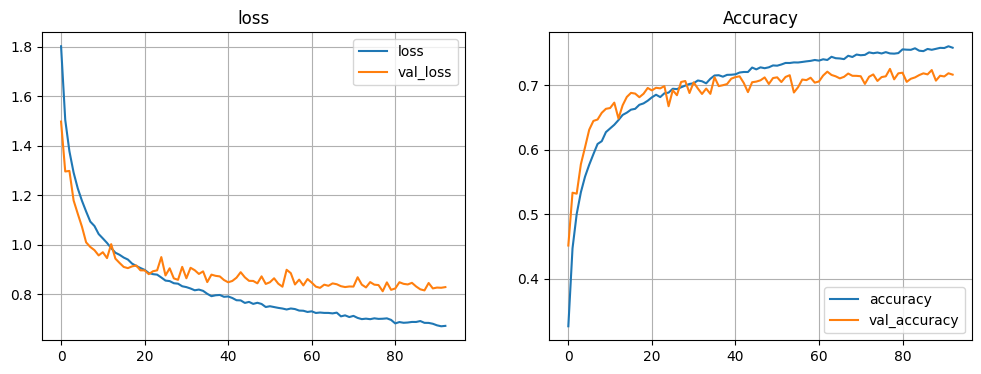

In [18]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize=[12,4])
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "loss", grid = True)
    metrics[["accuracy", "val_accuracy"]].plot(ax = ax[1], title="Accuracy", grid = True)

plot_metrics(metrics)

In [20]:
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)

def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(scaled_X_train,
              y_train,
              validation_split=1/6,
              epochs=20,
              callbacks=[early_stopper])
    metrics = pd.DataFrame(model.history.history)
    val_acc = metrics["val_accuracy"].iloc[-1]
    return val_acc

In [21]:
import numpy as np
np.arange(.1,.6,.1)

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [22]:
import numpy as np
dropout_accuracies = {}
for drop_rate in np.arange(.1,.6,.1):
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate=drop_rate)

c:\Users\MaxF�rsntr�m-AI23GBG\djup_maskin\Deep-Machinelearning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.4079 - loss: 1.6647 - val_accuracy: 0.5732 - val_loss: 1.2317
Epoch 2/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 44s 34ms/step - accuracy: 0.6164 - loss: 1.0830 - val_accuracy: 0.6586 - val_loss: 0.9821
Epoch 3/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 46s 36ms/step - accuracy: 0.6865 - loss: 0.8918 - val_accuracy: 0.6856 - val_loss: 0.9194
Epoch 4/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 74s 29ms/step - accuracy: 0.7391 - loss: 0.7563 - val_accuracy: 0.6944 - val_loss: 0.9240
Epoch 5/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.7735 - loss: 0.6505 - val_accuracy: 0.6879 - val_loss: 0.9469
Epoch 6/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 3826s 3s/step - accuracy: 0.8101 - loss: 0.5476 - val_accuracy: 0.7012 - val_loss: 0.9083
Epoch 7/20
1105/1303 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.8461 - loss: 0.4441

KeyboardInterrupt: 

In [ ]:
model_final = CNN_model(drop_rate = .2)

model_final.fit(scaled_X_train, y_train, epochs = 20)

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = model.predict(scaled_X_test)

y_pred = np.argmax(y_pred, axis = 1)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xticks(rotation = 90);